In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD


nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops = stops | {'said','would','could','told','also','one','two','mr','new','year','like','best','music'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dimitris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [19]:
count_vectorizer = CountVectorizer(stop_words=list(stops))
X = count_vectorizer.fit_transform(df['text'])

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
# call log-likelihood/ perplexity on test

In [20]:
svd = TruncatedSVD(n_components=10)
# .fit(): train model on etnire dataset.
# .fit_transform(): combines fit and trasform. Returns topic distribution for each document
# .partial_fit() Fit the model on a asubset of the dataset
svd.fit_transform(X)


array([[  4.67125604,  -1.35280469,  -1.28606144, ...,   1.07566206,
         -0.19900968,  -0.15420413],
       [  5.659174  ,   0.31607096,  -0.19543685, ...,  -0.36330381,
          1.23560287,   1.67972998],
       [  2.48837021,   0.63238248,  -0.42385123, ...,  -0.632334  ,
          1.34219749,   0.94317807],
       ...,
       [ 10.79616665,   0.44001422,  -2.9423476 , ...,  -3.61744285,
          3.12050335,  -0.30591821],
       [  5.122736  ,  -0.42118139,  -1.76684679, ...,  -1.76079599,
          1.56554201,  -1.04043265],
       [ 41.97943009, -21.43446382,   3.72957239, ...,   2.4758179 ,
          2.8127529 ,  45.68499562]])

In [21]:
# barplot for each topic 
# which words have the most weights
def plot_top_words(model,feature_names,n_top_words=10):
    fig,axes = plt.subplots(2,5,figsize = (30,15),sharex=True)
    axes = axes.flatten()
    
    for topic_idx,topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 :-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features,weights,height=0.7)
        ax.set_title(f"Topic {topic_idx+1}",fontdict={"fontsize":30})
        ax.invert_yaxis()
        ax.tick_params(axis="both",which="major",labelsize = 20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA',fontsize = 40)
        
    plt.subplots_adjust(top=0.90,bottom=0.05,wspace = 0.9,hspace=0.3)
    plt.show()
        
        

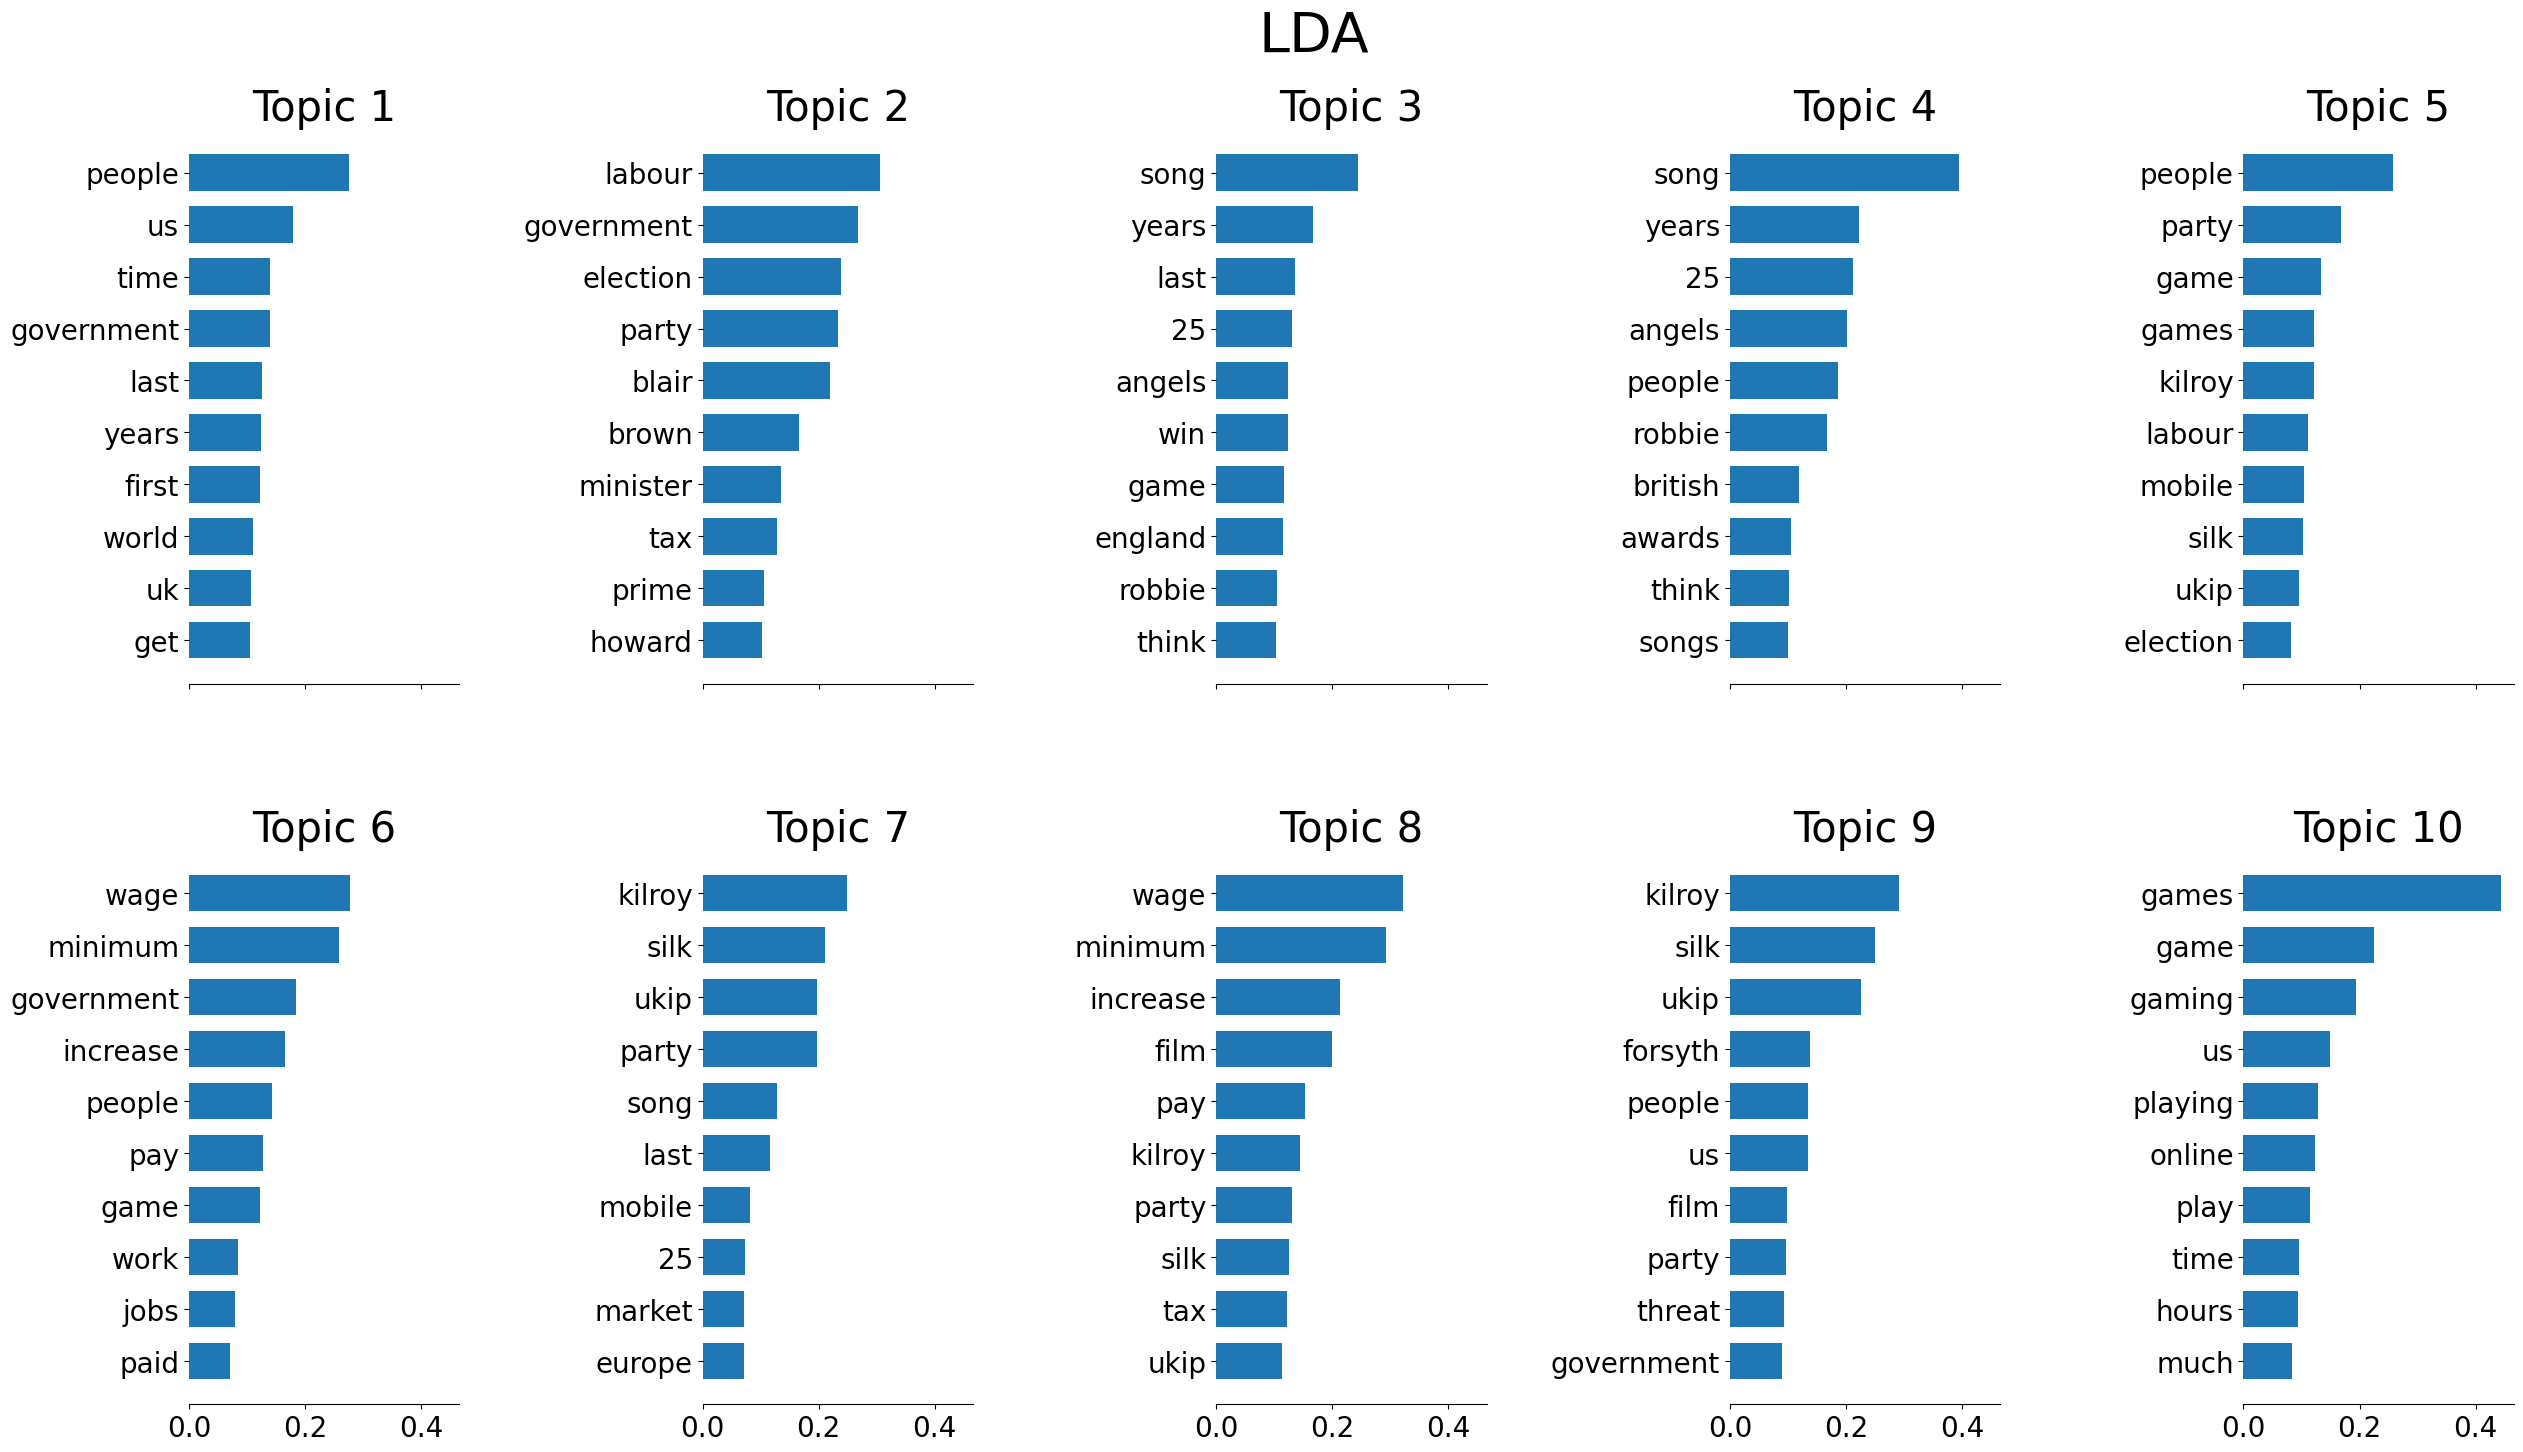

In [22]:
feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(svd,feature_names)
# many stopwords?

Text(0.5, 1.0, 'True label: sport ')

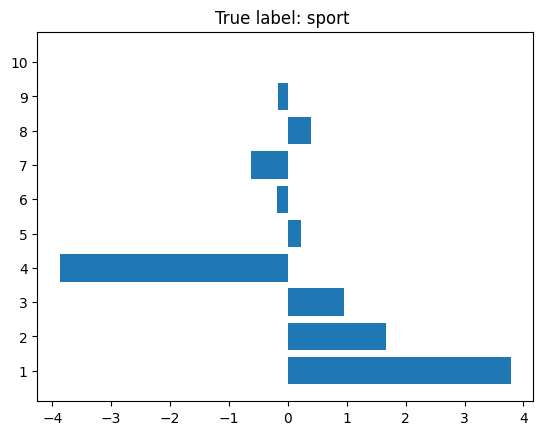

In [11]:
z = svd.transform(X)
# pick a random document 
#$ check which topics are assosicated with it
# are they related to the truth label?
#np.random.seed(0)
i = np.random.choice(len(df))
z = z[i]
topics = np.arange(10)+1

fig,ax = plt.subplots()
ax.barh(topics,z)
ax.set_yticks(topics)
ax.set_title('True label: %s '% df.iloc[i]['labels'])

In [12]:
def wrap(x):
    return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

McIlroy wins 800m indoor title

James McIlroy motored to the AAA's
Indoor 800m title in Sheffied on Sunday in a time of one minute, 47.97
seconds.

The Larne athlete dominated the race from start to finish
although he had to hold off a late challenge from Welshman Jimmy
Watkins in the final 100 metres.  "I had to go out and go through all
the gears before the Europeans and I won't run again until then," said
McIlroy.  ''I though if I got lucky I'd get close to the British
record but I blew up in the end.'' McIlroy has been in superb form at
the start of the season and will now start his build-up for the
European Indoors at Madrid on 4-6 March.  Meanwhile, Paul Brizzel and
Anna Boyle reached the semi-finals of the 60m hurdles with Boyle
setting a season's best of 7.48. In the women's 60m final, Ailis
McSweeney broke Michelle Carroll's long-standing Irish record by
clocking 7.37 which left her in third place.  David Gillick showed
that he is a genuine medal contender in the European Indo